In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('felicidadGDP.csv')
print(df.shape)
df.head()

(141, 3)


,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


In [70]:
df.dtypes

Pais          object
Felicidad    float64
GDP          float64
dtype: object

In [71]:
for i, pais in enumerate(df['Pais'], start=1):
    print(i, pais)

1 Finland
2 Denmark
3 Iceland
4 Switzerland
5 Netherlands
6 Luxembourg
7 Sweden
8 Norway
9 Israel
10 New Zealand
11 Austria
12 Australia
13 Ireland
14 Germany
15 Canada
16 United States
17 United Kingdom
18 Czechia
19 Belgium
20 France
21 Bahrain
22 Slovenia
23 Costa Rica
24 United Arab Emirates
25 Saudi Arabia
26 Singapore
27 Romania
28 Spain
29 Uruguay
30 Italy
31 Kosovo
32 Malta
33 Lithuania
34 Slovakia
35 Estonia
36 Panama
37 Brazil
38 Guatemala
39 Kazakhstan
40 Cyprus
41 Latvia
42 Serbia
43 Chile
44 Nicaragua
45 Mexico
46 Croatia
47 Poland
48 El Salvador
49 Kuwait
50 Hungary
51 Mauritius
52 Uzbekistan
53 Japan
54 Honduras
55 Portugal
56 Argentina
57 Greece
58 South Korea
59 Philippines
60 Thailand
61 Moldova
62 Jamaica
63 Kyrgyzstan
64 Belarus
65 Colombia
66 Bosnia and Herzegovina
67 Mongolia
68 Dominican Republic
69 Malaysia
70 Bolivia
71 China
72 Paraguay
73 Peru
74 Montenegro
75 Ecuador
76 Vietnam
77 Russia
78 Hong Kong
79 Armenia
80 Tajikistan
81 Nepal
82 Bulgaria
83 Libya
84 

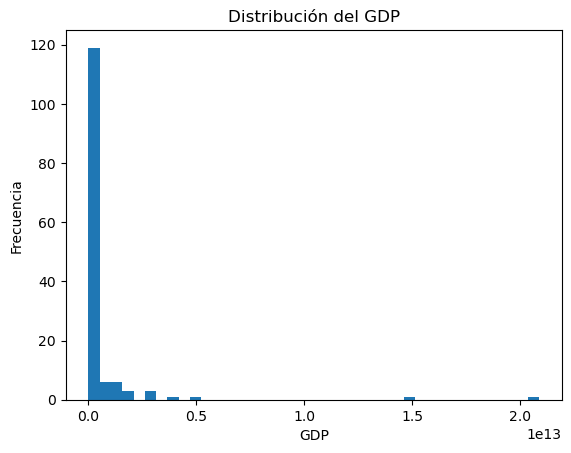

In [72]:
plt.figure()
plt.hist(df['GDP'], bins=40)
plt.xlabel('GDP')
plt.ylabel('Frecuencia')
plt.title('Distribución del GDP')
plt.show()

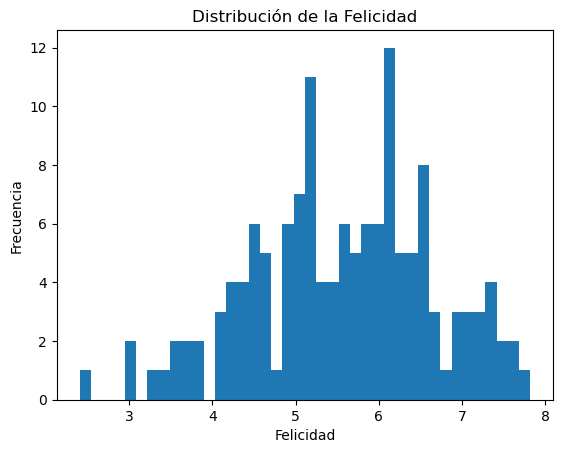

In [73]:
plt.figure()
plt.hist(df['Felicidad'], bins=40)
plt.xlabel('Felicidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Felicidad')
plt.show()

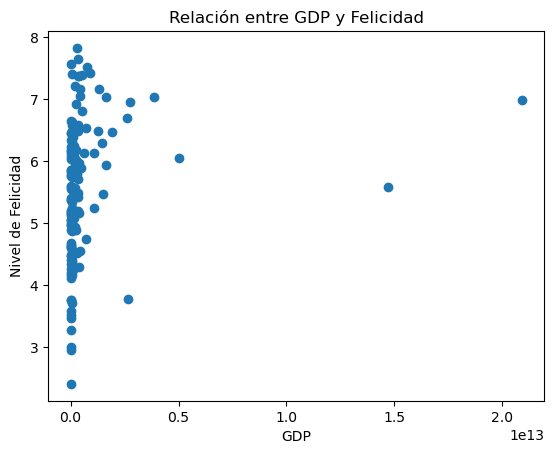

In [74]:
plt.figure()
plt.scatter(df['GDP'], df['Felicidad'])
plt.xlabel('GDP')
plt.ylabel('Nivel de Felicidad')
plt.title('Relación entre GDP y Felicidad')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
X = df[['GDP']]
y = df['Felicidad']
print(X.shape)
print(y.shape)

(141, 1)
(141,)


In [76]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [77]:
r2 = modelo.score(X, y)
print('R2:', r2)

R2: 0.02963883423511693


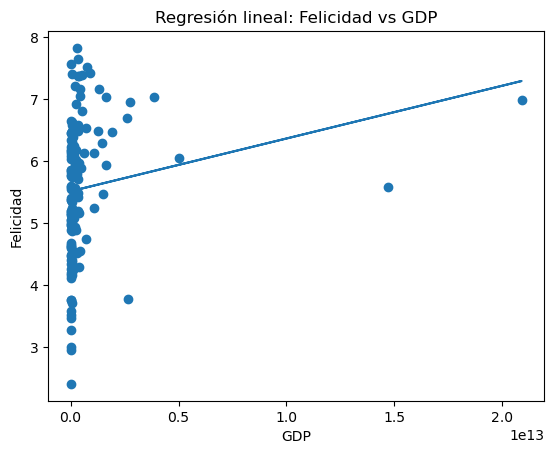

In [90]:
y_pred = modelo.predict(X)
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel('GDP')
plt.ylabel('Felicidad')
plt.title('Regresión lineal: Felicidad vs GDP')
plt.show()

In [79]:
extra = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/happy.csv")
print(extra.shape)
extra.head()

(157, 7)


,Unnamed: 0,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.
0,1,Denmark,7.526,1.44178,1.16374,0.79504,0.44453
1,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.41203
2,3,Iceland,7.501,1.42666,1.18326,0.86733,0.14975
3,4,Norway,7.498,1.57744,1.12690,0.79579,0.35776
4,5,Finland,7.413,1.40598,1.13464,0.81091,0.41004


In [80]:
extra = extra[[
    "Country",
    "Economy..GDP.per.Capita.",
    "Family",
    "Health..Life.Expectancy.",
    "Trust..Government.Corruption."
]]

extra = extra.rename(columns={
    "Country": "Pais",
    "Economy..GDP.per.Capita.": "GDP_pc",
    "Family": "Apoyo_social",
    "Health..Life.Expectancy.": "Esperanza_vida",
    "Trust..Government.Corruption.": "Corrupcion"
})

In [81]:
df_final = df.merge(extra, on="Pais", how="inner")
print(df_final.shape)
df_final.head()

(134, 7)


,Pais,Felicidad,GDP,GDP_pc,Apoyo_social,Esperanza_vida,Corrupcion
0,Finland,7.8210,2.718370e+11,1.40598,1.13464,0.81091,0.41004
1,Denmark,7.6362,3.560850e+11,1.44178,1.16374,0.79504,0.44453
2,Iceland,7.5575,2.171808e+10,1.42666,1.18326,0.86733,0.14975
3,Switzerland,7.5116,7.522480e+11,1.52733,1.14524,0.86303,0.41203
4,Netherlands,7.4149,9.138650e+11,1.46468,1.02912,0.81231,0.29927


In [82]:
X1 = df_final[["GDP_pc", "Apoyo_social", "Esperanza_vida", "Corrupcion"]]
y1 = df_final["Felicidad"]
print(X.shape)
print(y.shape)

(141, 1)
(141,)


In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((107, 4), (27, 4), (107,), (27,))

In [84]:
modelo1 = LinearRegression()
modelo1.fit(x_train, y_train)

LinearRegression()

In [89]:
print("Intercepto:", modelo1.intercept_)

print("Coeficientes:")
print(modelo1.coef_)

print("\nR2 entrenamiento:", modelo1.score(x_train, y_train))
print("R2 prueba:", modelo1.score(x_test, y_test))

Intercepto: 2.790224597307196
Coeficientes:
[0.38231252 1.30267036 1.84508659 2.11577271]

R2 entrenamiento: 0.6862704915459814
R2 prueba: 0.6412192021173904
